<a href="https://colab.research.google.com/github/nurmayadi/learn-data-visualization/blob/main/data_visualization_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pie Chart, Box Plots, Scatter Plots, and Bubble Plots

#Downloading and Prepping Data

In [6]:
!pip install openpyxl==3.0.9 -q

     |████████████████████████████████| 242 kB 10.0 MB/s 


import numpy and pandas

In [7]:
import numpy as np
import pandas as pd

Download dataset: Canadian Immigration data

then, load it into pandas dataframe

In [8]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
df = pd.read_excel(
    url,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)

df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
df.shape

(195, 43)

##Clean Up Data

In [10]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df.set_index('Country', inplace=True)

# add total column
df['Total'] = df.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df.shape)

data dimensions: (195, 38)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


#Visualizing Data using Matplotlib

In [11]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

#Pie Charts

A pie chart is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices.

Example: pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

Step 1: Gather Data

use pandas groupby method

In [14]:
df_continents = df.groupby('Continent', axis=0).sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Step 2: Plot the Data

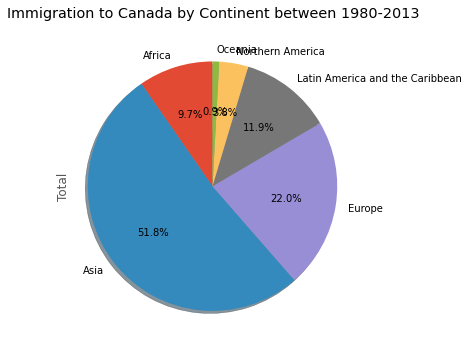

In [17]:
df_continents['Total'].plot(
    kind='pie',
    figsize=(5,6),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
)

plt.title('Immigration to Canada by Continent between 1980-2013')
plt.axis('equal')
plt.show()

Improve visual

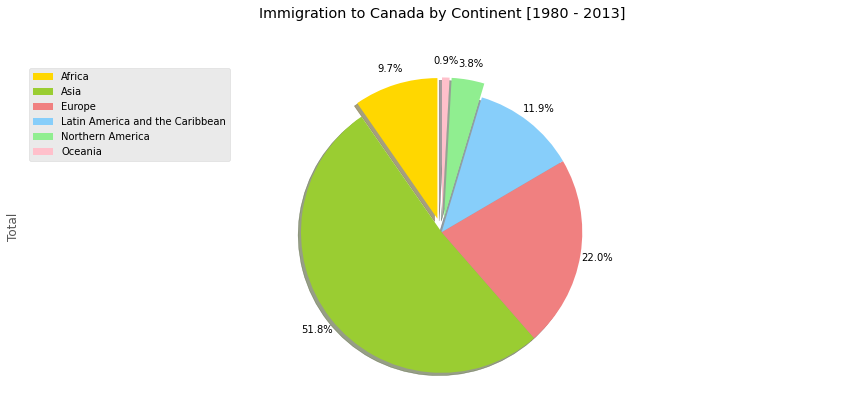

In [18]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(
    kind='pie',
    figsize=(15, 6),
    autopct='%1.1f%%', 
    startangle=90,    
    shadow=True,       
    labels=None,         
    pctdistance=1.12,     
    colors=colors_list,  
    explode=explode_list 
    )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left') 
plt.show()

Example: pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

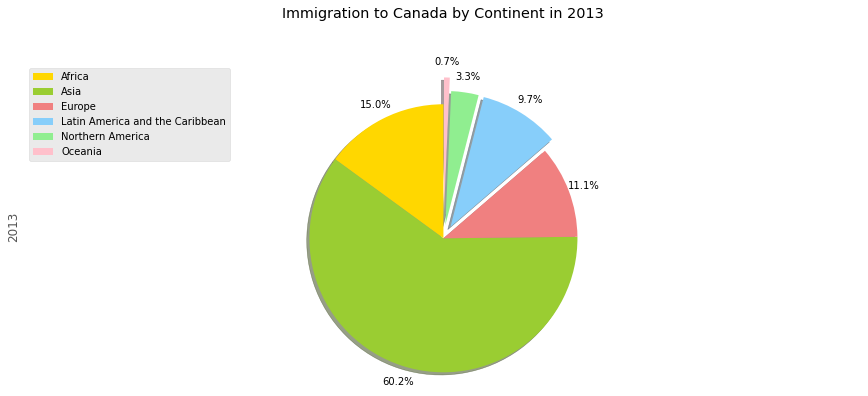

In [19]:
explode_list = [0, 0, 0, 0.1, 0.1, 0.2]

df_continents['2013'].plot(
    kind='pie',
    figsize=(15, 6),
    autopct='%1.1f%%', 
    startangle=90,    
    shadow=True,       
    labels=None,         
    pctdistance=1.12,     
    colors=colors_list,  
    explode=explode_list 
    )

plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left') 
plt.show()

# Box Plots

A box plot is a way of statistically representing the *distribution* of the data through five main dimensions: Minimum, First Quartile, Second Quartile( Median), Third Quartile, and Maximum.

Example: Plot the box plot for the Japanese iimigrants between 1980-2013

Step 1: Get subset of the dataset

In [20]:
df_japan = df.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Step 2: Plot by passing in kind='box'.

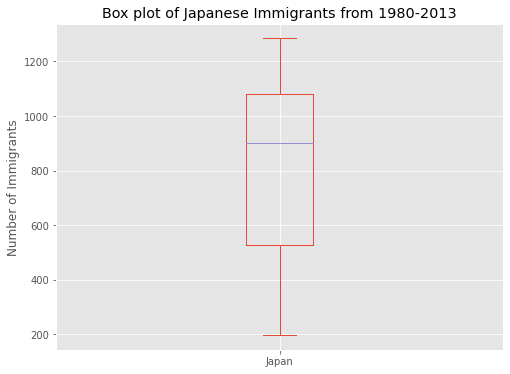

In [21]:
df_japan.plot(
    kind='box',
    figsize=(8,6)
)

plt.title('Box plot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [22]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Example: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013

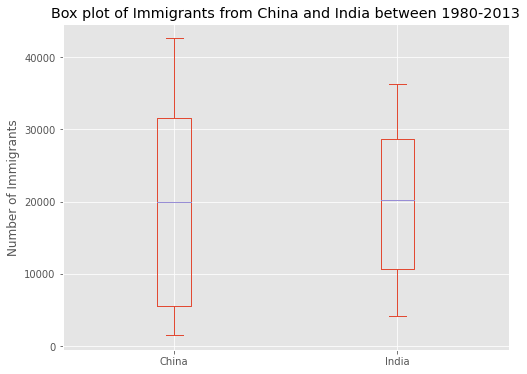

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


In [25]:
df_CI = df.loc[['China','India'], years].transpose()

df_CI.plot(
    kind='box',
    figsize=(8,6)
)

plt.title('Box plot of Immigrants from China and India between 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()


df_CI.describe()

Horizontal Box Plot

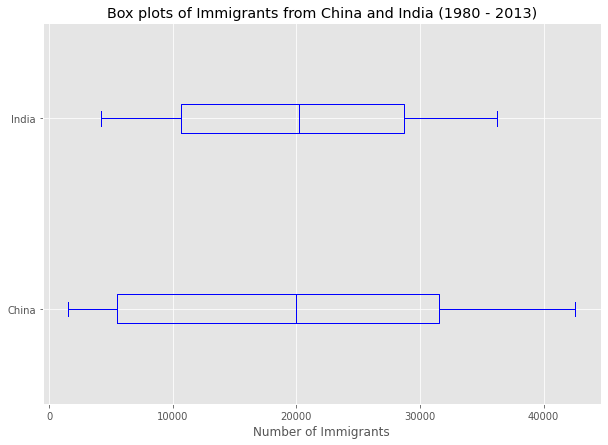

In [26]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

Subplots

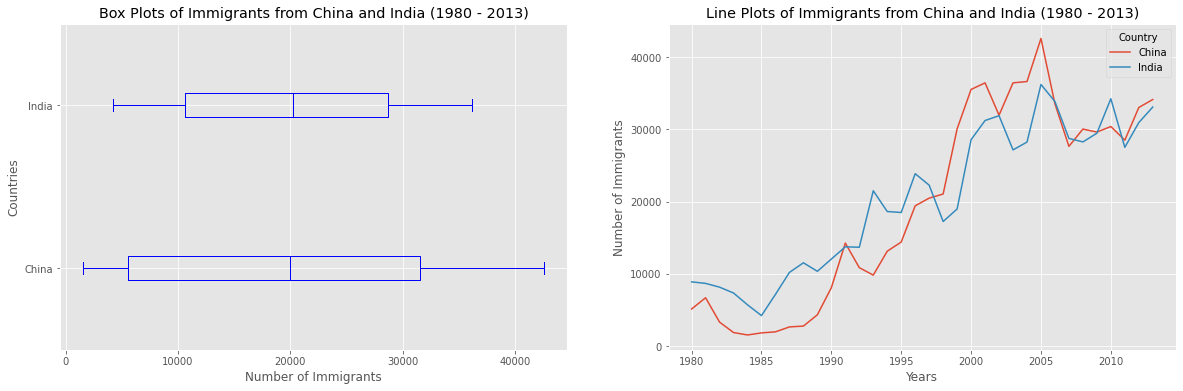

In [27]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

Example: box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s

In [28]:
df_top15 = df.sort_values(['Total'], ascending=False, axis=0).head(15)

In [29]:
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [30]:
 new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


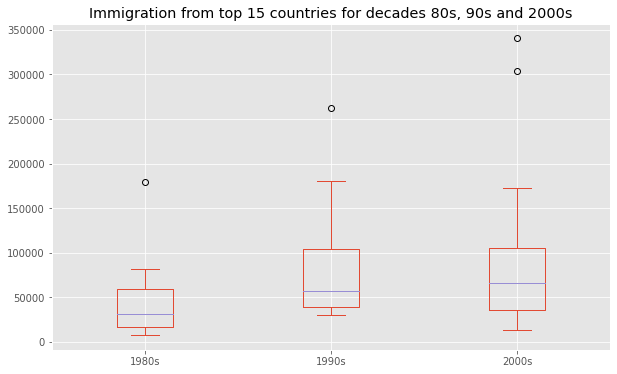

In [31]:
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

In [32]:
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


#Scatter Plots

A scatter plot (2D) is a useful method of comparing variables against each other

Example: visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

Step 1: Get the Dataset

In [33]:
df_tot = pd.DataFrame(df[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot the data.

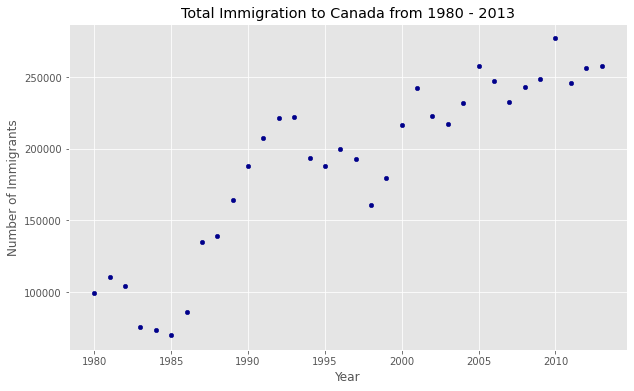

In [34]:
df_tot.plot(
    kind='scatter',
    x='year',
    y='total',
    figsize=(10, 6),
    color='darkblue'
    )

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit

In [35]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

Step 2: Plot the regression line on the scatter plot.

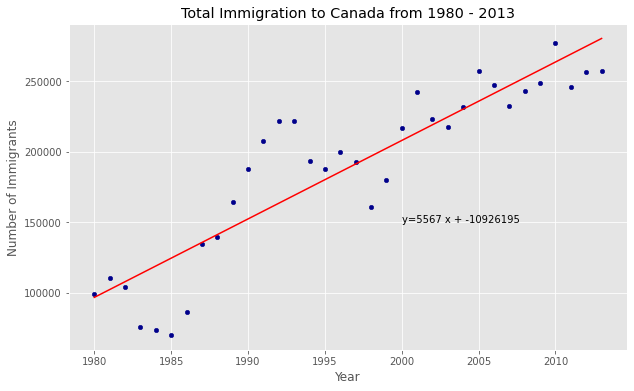

'No. Immigrants = 5567 * Year + -10926195'

In [36]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Example: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013

Step 1: Get the Data

In [40]:
df_countries = df.loc[['Denmark','Norway','Sweden'], years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace = True)

df_total.columns = ['year', 'total']

df_total['year'] = df_total['year'].astype(int)

df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Step 2: Generate the scatter plot by plotting the total versus year in df_total.

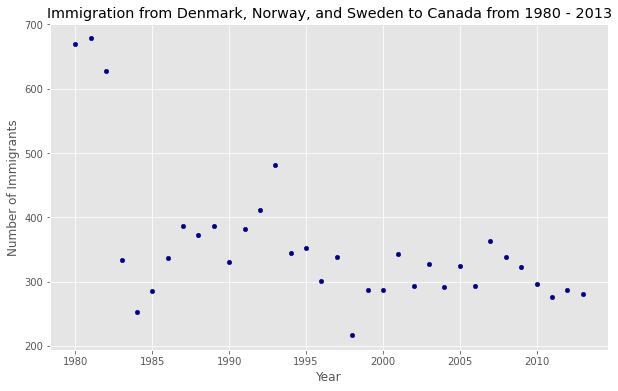

In [41]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

#Bubble Plots

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z)

Example: Analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil


Step 1: Get the data for Brazil and Argentina.

In [42]:
# transposed dataframe
df_t = df[years].transpose()

# cast the Years (the index) to type int
df_t.index = map(int, df_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_t.reset_index(inplace=True)

# view the changes
df_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


Step 2: Create the normalized weights.

In [43]:
# normalize Brazil data
norm_brazil = (df_t['Brazil'] - df_t['Brazil'].min()) / (df_t['Brazil'].max() - df_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_t['Argentina'] - df_t['Argentina'].min()) / (df_t['Argentina'].max() - df_t['Argentina'].min())

Step 3: Plot the data.

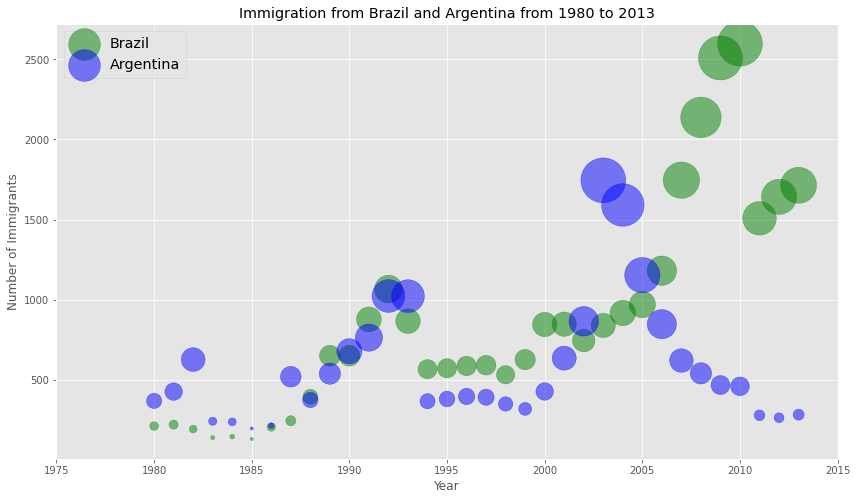

In [44]:
# Brazil
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

Example: Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df_can_t that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [45]:
# normalized Chinese data
norm_china = (df_t['China'] - df_t['China'].min()) / (df_t['China'].max() - df_t['China'].min())

# normalized Indian data
norm_india = (df_t['India'] - df_t['India'].min()) / (df_t['India'].max() - df_t['India'].min())

Step 2: Generate the bubble plots.

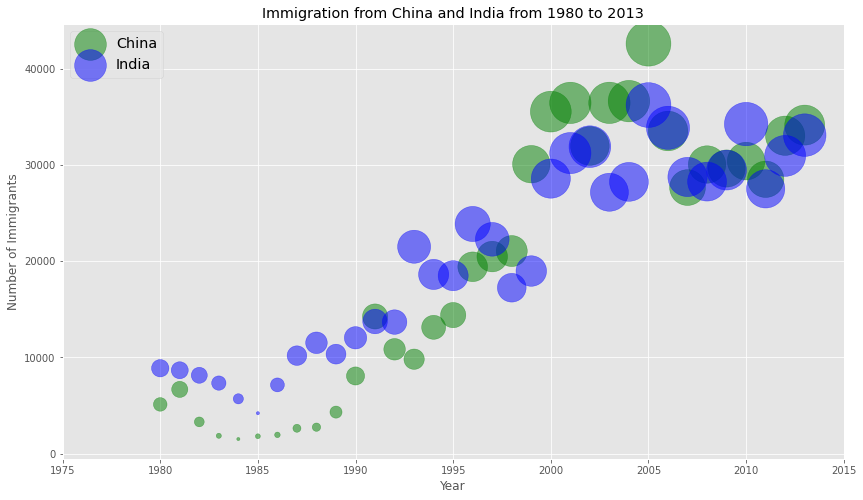

In [46]:
#China
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# India
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 to 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')